## Linear Regression
If the target value is expected to be a linear combination of the features. we can use linear-regression

y_hat = Weight-vector * Feature-vector

Weight-vector = [w0, w1, w2 ...]
we refer W0 as the intercept as the rest as coeff

LinearRegression fits a linear model with intercept & coefficients [w0, w1, w2 ...] to minimize the residual sum of squares between the true targets in the dataset, and the prediction made by the linear approximation.

The coefficient estimates for Ordinary Least Squares rely on the independence of the features.
When features are correlated , the least-squares estimate becomes highly sensitive to random errors and produce a large variance. This situation is called multicollinearity can arise.



In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Data

In [6]:
# import the data
diabetes = datasets.load_diabetes(as_frame=True)

In [13]:
df = pd.DataFrame(data=diabetes.data)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


## Features and Lables

In [35]:
# Use only one feature
X = df.loc[:,['bmi']]
# labels 
y = diabetes.target.values

In [40]:
# train - test split

X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size=0.2, random_state=72)
print('shape of X_train',X_train.shape)
print('shape of y_train',y_train.shape)
print('shape of X_test',X_test.shape)
print('shape of y_test',y_test.shape)

shape of X_train (353, 1)
shape of y_train (353,)
shape of X_test (89, 1)
shape of y_test (89,)


## Model

In [42]:
linear = LinearRegression()
linear.fit(X_train,y_train)

# prediction
y_preds = linear.predict(X_test)

## Plotting

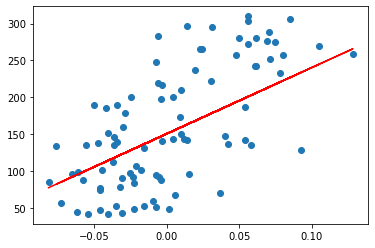

In [48]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_preds, color='red')
plt.show()

## Evaluation Metrics 

In [53]:
# The coefficients
print("Coefficients: \n", linear.coef_)
print("Intercept: \n", linear.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [896.13196019]
Intercept: 
 150.7022771481482
Mean squared error: 3858.22
Coefficient of determination: 0.42
